## 1.引入包

In [1]:
#-*- coding=utf-8 -*-
import pandas as pd
import pylab
import collections
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
from scipy.optimize import leastsq
from sklearn import datasets, linear_model
import datetime

## 2. 画直方图

In [6]:
# 参数依次为list,抬头,X轴标签,Y轴标签,XY轴的范围
def draw_hist(myList,Title,Xlabel,Ylabel,Xmin,Xmax,Ymin,Ymax):
    plt.hist(myList,100)
    plt.xlabel(Xlabel)
    plt.xlim(Xmin,Xmax)
    plt.ylabel(Ylabel)
    plt.ylim(Ymin,Ymax)
    plt.title(Title)
    plt.show()


## 3.画双对数坐标

In [25]:
def drawloglog(data,title):
    feature_count_pairs = collections.Counter(data).most_common()
    feature_value = zip(*feature_count_pairs)[0]
    count = zip(*feature_count_pairs)[1]
    plt.title(title)
    plt.loglog(feature_value, count,'ro',color='blue')
    plt.show()

## 4.主程序

### 4.1 群体用户半年动态序列（小时）

In [51]:
Location = r'../数据/论文用/群体用户半年动态序列.csv'
#df = pd.read_csv(Location,dtype={'user_detail.userid':np.str,'user_detail.following_count':np.int32})
df = pd.read_csv(Location)
import datetime
created_time = df['activity.created_time']
format_time = []
for time in created_time:
    dt = datetime.datetime.fromtimestamp(time)
    format_time.append(dt)
weeks = []
hours = []
for time in format_time:
    week = time.weekday()
    hour = time.hour
    weeks.append(week+1)
    hours.append(hour+1)

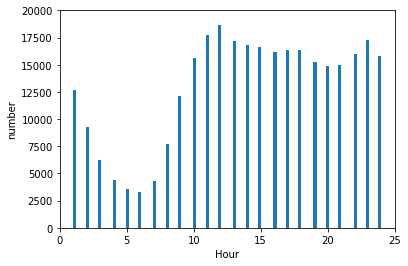

In [54]:
draw_hist(hours,'','Hour','number',0,25,0.0,20000)

### 4.2 群体用户动态类型统计

In [35]:
activity_count = df.groupby(['activity.act_type']).count()

In [46]:
activity_sorted = activity_count.sort_values(['activity.actor'],ascending=0)

In [47]:
activity_type = ['ANSWER_VOTE_UP',
'ANSWER_CREATE','QUESTION_FOLLOW','MEMBER_VOTEUP_ARTICLE',
'MEMBER_COLLECT_ANSWER',
'MEMBER_CREATE_ARTICLE',
]

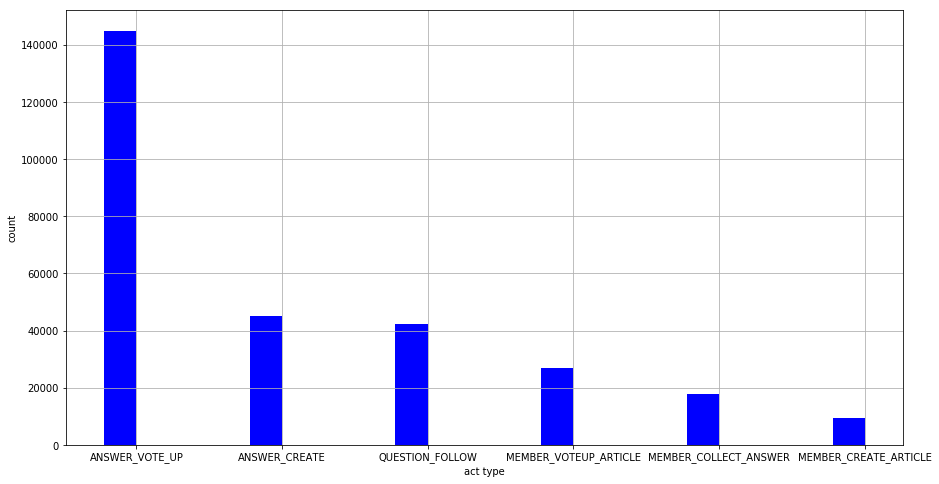

In [50]:
def draw_bar(labels,quants):  
    width = 0.4  
    ind = np.linspace(0.5,9.5,6)  
    # make a square figure  
    fig = plt.figure(figsize=(15,8))  
    
    ax  = fig.add_subplot(111)  
    # Bar Plot  
    ax.bar(ind-width/2,quants,width,color='blue')  
    # Set the ticks on x-axis  
    ax.set_xticks(ind)  
    ax.set_xticklabels(labels)  
    # labels  
    ax.set_xlabel('act type')  
    ax.set_ylabel('count')  
    # title  
    #ax.set_title('act_type')  
    plt.grid(True)  
    plt.show()  

draw_bar(activity_type,activity_sorted['activity.actor'].head(6))